# 標本平均から元の平均を推計する

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# plt.rcParams['font.size'] = 24
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['figure.subplot.bottom']=0.2
plt.rcParams['figure.subplot.left']=0.2

In [3]:
def estimateRange(mean: float, s: float, n: int, f: float) -> dict[str, float]:
    """
    区間を推定
    """
    minX = mean - f * s / np.sqrt(n)
    maxX = mean + f * s / np.sqrt(n)
    return {'lower' : minX, 'higher' : maxX}

In [4]:
def evalSample(n : int) -> tuple[float, float]:
    """
    大きさnの標本に対して、平均と分散を返す
    """
    d = np.zeros(n)
    for i in range(n):
        d[i] = np.random.rand()#[0,1)の乱数
    x = 0
    for i in range(n):
        x += d[i]
    mean = x / n
    s = 0
    for i in range(n):
        s += (d[i] - mean) * (d[i] - mean)
    s = s / (n - 1)
    return mean, np.sqrt(s)

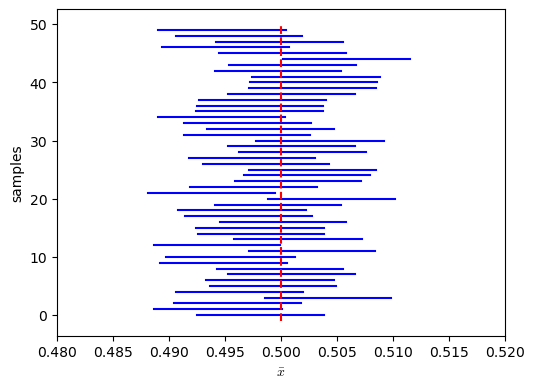

In [5]:
alpha = 0.05 #信頼度
f = norm.isf(alpha / 2) #信頼度に対応した標準正規分布の変位
sampleSize = 10000 #標本サイズ
num_trial = 50 #標本数
result = list()
for i in range(num_trial):
    m, s = evalSample(sampleSize)
    r = estimateRange(m, s, sampleSize, f)
    result.append(r)

#作図
fig, ax = plt.subplots()
ax.set_xlim(.48, .52)
ax.set_xlabel('$\\bar{x}$')
ax.set_ylabel('samples')
#各標本の推定を表示
for i, r in enumerate(result):
    ax.plot([r['lower'], r['higher']], [i, i], 'b')
#population mean
ax.vlines(0.5, -1,50, color = 'r', linestyle = '--', zorder = 100)
fig.savefig('populationMean.pdf')
plt.show()